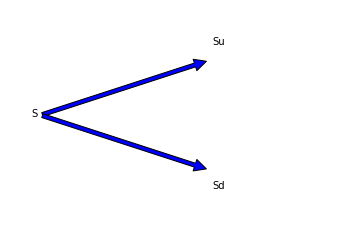

In [9]:
import matplotlib.pyplot as plt
plt.xlim(0,1)
plt.figtext(0.18,0.5,"S")
plt.figtext(0.6,0.5 + 0.25,"Su")
plt.figtext(0.6,0.5 - 0.25,"Sd")

plt.annotate("",xy=(0.6,0.5 + 0.25), xytext=(0.1,0.5),arrowprops=dict(facecolor="b", shrink = 0.01))
plt.annotate("",xy=(0.6,0.5 - 0.25), xytext=(0.1,0.5),arrowprops=dict(facecolor="b", shrink = 0.01))
plt.axis("off")
plt.show()

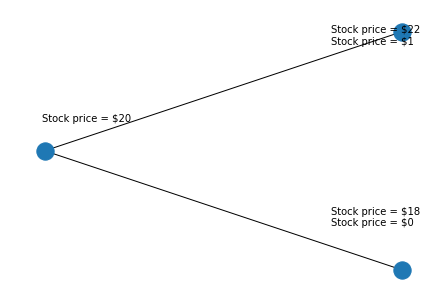

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figtext(0.08,0.6,"Stock price = $20")
plt.figtext(0.75,0.91,"Stock price = $22")
plt.figtext(0.75,0.87,"Stock price = $1")
plt.figtext(0.75,0.28,"Stock price = $18")
plt.figtext(0.75,0.24,"Stock price = $0")
n = 1
def binomial_grid(n):
    G = nx.Graph()
    for i in range(0, n+1):
        for j in range(1,i+2):
            if i<n:
                G.add_edge((i,j),(i+1,j))
                G.add_edge((i,j), (i+1,j+1))
    posG = {}
    for node in G.nodes():
        posG[node] = (node[0], n+2+node[0] - 2*node[1])
    nx.draw(G, pos = posG)
binomial_grid(n)
plt.show()


In [337]:



def binomialCallAmerican(S,X,T,r,sigma,n): 
    '''
    :param S: Asset price
    :param X: Strike Price
    :param T: Time to Maturity
    :param r: riskfree rate
    :param sigma: volatility
    :param n: number of periods for binomial tree
    '''
    from math import exp,sqrt 
    import numpy as np 
    deltaT = T /n
    u = exp(sigma * sqrt(deltaT)) 
    d = 1.0 / u
    a = exp(r * deltaT) 
    p = (a - d) / (u - d)
    v = [[0.0 for j in range(i + 1)] for i in range(n + 1)] 
    for j in range(n+1):
        v[n][j] = max(S * u**j * d**(n - j) - X, 0.0) 
    for i in range(n-1, -1, -1): 
        for j in range(i + 1):
            v1=exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j]) 
            v2=max(S * u**j * d**(i - j)-X,0)
            v[i][j]=max(v1,v2) 
    return v[0][0]
            # early exercise

binomialCallAmerican(90,100,5/12,0.08,0.3,10)



2.7043509153604672

In [321]:
def binomialCallEuropean(S,X,T,r,sigma,n): 
    '''
    :param S: Asset price
    :param X: Strike Price
    :param T: Time to Maturity
    :param r: riskfree rate
    :param sigma: volatility
    :param n: number of periods for binomial tree
    '''
    from math import exp,sqrt 
    deltaT = T /n
    u = exp(sigma * sqrt(deltaT))
    d = 1.0 / u
    a = exp(r * deltaT) 
    p = (a - d) / (u - d)
    v = [[0.0 for j in range(i + 1)] for i in range(n + 1)] 
    for j in range(n+1):
        v[n][j] = max(S * u**j * d**(n - j) - X, 0.0) 
    for i in range(n-1, -1, -1): 
        for j in range(i + 1):
            v[i][j]=exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j]) 
    return v[0][0]

binomialCallEuropean(90,100,5/12,0.08,0.3,10)

2.5894189580734523

In [338]:
def binomialPutAmerican(S,X,T,r,sigma,n): 
    '''
    :param S: Asset price
    :param X: Strike Price
    :param T: Time to Maturity
    :param r: riskfree rate
    :param sigma: volatility
    :param n: number of periods for binomial tree
    '''
    from math import exp,sqrt 
    import numpy as np 
    deltaT = T /n
    u = exp(sigma * sqrt(deltaT)) 
    d = 1.0 / u
    a = exp(r * deltaT) 
    p = (a - d) / (u - d)
    v = [[0.0 for j in range(i + 1)] for i in range(n + 1)] 
    for j in range(n+1):
        v[n][j] = max(X - S * u**j * d**(n - j) , 0.0) 
    for i in range(n-1, -1, -1): 
        for j in range(i + 1):
            v1=exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j]) 
            v2=max( X-S * u**j * d**(i - j),0)
            v[i][j]=max(v1,v2) 
            
            
    return v[0][0]
            # early exercise

binomialPutAmerican(90,100,5/12,0.08,0.3,10)

11.818336104465045

In [216]:
def binomialPutEuropean(S,X,T,r,sigma,n): 
    '''
    :param S: Asset price
    :param X: Strike Price
    :param T: Time to Maturity
    :param r: riskfree rate
    :param sigma: volatility
    :param n: number of periods for binomial tree
    '''
    from math import exp,sqrt 
    deltaT = T /n
    u = exp(sigma * sqrt(deltaT))
    d = 1.0 / u
    a = exp(r * deltaT) 
    p = (a - d) / (u - d)
    v = [[0.0 for j in range(i + 1)] for i in range(n + 1)] 
    for j in range(n+1):
        v[n][j] = max(X - S * u**j * d**(n - j) , 0.0) 
    for i in range(n-1, -1, -1): 
        for j in range(i + 1):
            v[i][j]=exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j]) 
    return v[0][0]

binomialPutEuropean(90,100,5/12,0.08,0.3,10)

11.021708541434913

In [210]:
import scipy
N_prime = scipy.stats.norm.pdf


def vega(S, X, T, r, sigma):
    import numpy as np
    '''

    :param S: Asset price
    :param X: Strike price
    :param T: Time to Maturity
    :param r: risk-free rate (treasury bills)
    :param sigma: volatility
    :return: partial derivative w.r.t volatility
    '''

    ### calculating d1 from black scholes
    d1 = (np.log(S / X) + (r + sigma ** 2 / 2) * T) / sigma * np.sqrt(T)

    #calculate vega
    vega = S  * np.sqrt(T) * N_prime(d1)
    return vega
N_prime(10)

7.69459862670642e-23

In [211]:
def implied_volatility_call(C, S, X, T, r, tol=0.0001,max_iterations=100):
    '''

    :param C: Observed call price
    :param S: Asset price
    :param X: Strike Price
    :param T: Time to Maturity
    :param r: riskfree rate
    :param tol: error tolerance in result
    :param max_iterations: max iterations to update vol
    :return: implied volatility in percent
    '''


    ### assigning initial volatility estimate for input in Newton_rap procedure
    sigma = 0.3

    for i in range(max_iterations):

        ### calculate difference between binomial price and market price with
        ### iteratively updated volality estimate
        diff = binomialCallEuropean(S,X,T,r,sigma,1000) - C

        ###break if difference is less than specified tolerance level
        if abs(diff) < tol:
            print(f'found on {i}th iteration')
            print(f'difference is equal to {diff}')
            break

        ### use newton rapshon to update the estimate
        sigma = sigma - diff / vega(S, X, T, r, sigma)

    return sigma
X = 10600
C = 218.60
S = 9166
r = 0.01
T = 1.12
imp_vol = implied_volatility_call(C,S,X,T,r)
print('Implied volatility using Newton Rapshon is: ',imp_vol)

found on 5th iteration
difference is equal to 6.808580474171322e-05
Implied volatility using Newton Rapshon is:  0.16553037933141238


In [212]:
X = [10600,9800,9200,8400,7600]
X = list(X)
C = [218.60,491.90,796.80,1323.40,1955.50]
C = list(C)
S = 9166
r = 0.01
T = 1.12

for i in range(5):
    imp_vol = implied_volatility_call(C[i],S,X[i],T,r)
    print('Implied volatility using Newton Rapshon is: ',imp_vol)

found on 5th iteration
difference is equal to 6.808580474171322e-05
Implied volatility using Newton Rapshon is:  0.16553037933141238
found on 3th iteration
difference is equal to 4.6960232737092156e-05
Implied volatility using Newton Rapshon is:  0.1822320278451953
found on 3th iteration
difference is equal to -1.7541542092658347e-05
Implied volatility using Newton Rapshon is:  0.19799587614242586
found on 5th iteration
difference is equal to -1.6350377109120018e-05
Implied volatility using Newton Rapshon is:  0.2238841123961012
found on 7th iteration
difference is equal to -1.7228876231456525e-05
Implied volatility using Newton Rapshon is:  0.2570300607050749


In [336]:
import pandas as pd
# Create dictionary for each type of option
AmericanCall = {"Interest rate":[], "American Call Price":[]}
AmericanPut = {"Interest rate":[], "American Put Price":[]}
EuropeanCall = {"Interest rate":[], "European Call Price":[]}
EuropeanPut = {"Interest rate":[], "European Put Price":[]}
interest = []
for j in range(0,51):
    interest.append(j/100)
    interest.append(-j/100)

interest.sort()

interest = list(interest)
for r in range(100):
    #Append interest rate and option price to dictionaries
    # print(interest[r],binomialCallAmerican(90,100,5/12,interest[r],0.3,10))
    AmericanCall["Interest rate"].append(interest[r])
    AmericanCall["American Call Price"].append(binomialCallAmerican(90,100,5/12,interest[r],0.3,10))
    EuropeanCall["Interest rate"].append(interest[r])
    EuropeanCall["European Call Price"].append(binomialCallEuropean(90,100,5/12,interest[r],0.3,10))
    AmericanPut["Interest rate"].append(interest[r])
    AmericanPut["American Put Price"].append(binomialPutAmerican(90,100,5/12,interest[r],0.3,10))
    EuropeanPut["Interest rate"].append(interest[r])
    EuropeanPut["European Put Price"].append(binomialPutEuropean(90,100,5/12,interest[r],0.3,10))

#Transform dictionaries into dataframe
AmericanCall = pd.DataFrame(AmericanCall)
AmericanPut = pd.DataFrame(AmericanPut)
EuropeanCall = pd.DataFrame(EuropeanCall)
EuropeanPut = pd.DataFrame(EuropeanPut)
EuropeanCall

#Merge dataframes
df = pd.concat([AmericanCall,EuropeanCall,AmericanPut,EuropeanPut], axis=1)
df
#Export to CSV
df.to_csv("C:/Users/Desktop/Desktop/Options.csv")
